In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn import preprocessing

#import tensorflow as ts
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential
#from tensorflow.keras import regularizers
#import statistics
#from keras.utils import to_categorical

from sklearn.tree import DecisionTreeClassifier
#from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from sklearn import preprocessing
from sklearn import utils

In [2]:
data = pd.read_json("business.json", lines=True)

In [3]:
# focus just open business
data_open = data[data['is_open']==1]
data_open = data_open.dropna()
data_open = data_open.drop(["address", "business_id", "name", "is_open"], 1)

# focus just restaurants
data_open = data_open[data_open["categories"].str.contains("Restaurant", regex=True)]

# create x, y(rating "stars") and split as train & test dataset
y = data_open["stars"]
X = data_open.drop("stars", 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [4]:
X_train["categories"] = X_train["categories"].astype("str")
X_train["categories"] = X_train["categories"].str.split(", ")

X_test["categories"] = X_test["categories"].astype("str")
X_test["categories"] = X_test["categories"].str.split(", ")

mlb = MultiLabelBinarizer()
categories_train = mlb.fit_transform(X_train["categories"])
categories_test = mlb.transform(X_test["categories"])
categories_names = mlb.classes_

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [5]:
cat_train_sum = categories_train.sum(axis=0)
first_valid = False

df_categories_train = pd.DataFrame(categories_train)
df_categories_test = pd.DataFrame(categories_test)
cat_names = []

for column, res in enumerate(cat_train_sum, 0):
    if res >= 1000:
        if first_valid:
            cat_train = pd.concat([cat_train, df_categories_train.iloc[:,column]], axis=1)
            cat_test = pd.concat([cat_test, df_categories_test.iloc[:,column]], axis=1)
        else:
            cat_train = df_categories_train.iloc[:,column]
            cat_test = df_categories_test.iloc[:,column]
            first_valid = True
        cat_names.append(categories_names[column])
        
cat_train.shape
cat_test.sum(axis=0)

18      709
19     1211
60     1354
90      926
98      909
105     494
129     475
130     614
142     636
212     480
221    1212
234    2321
324     720
326     409
380     620
400    1389
453    1020
493    8352
499     503
501    1122
506     442
dtype: int64

In [6]:
cat_names

['American (New)',
 'American (Traditional)',
 'Bars',
 'Breakfast & Brunch',
 'Burgers',
 'Cafes',
 'Chicken Wings',
 'Chinese',
 'Coffee & Tea',
 'Event Planning & Services',
 'Fast Food',
 'Food',
 'Italian',
 'Japanese',
 'Mexican',
 'Nightlife',
 'Pizza',
 'Restaurants',
 'Salad',
 'Sandwiches',
 'Seafood']

In [7]:
print(categories_train.shape)
print(categories_test.shape)
print(len(categories_names))
print(cat_train.shape)
print(cat_test.shape)

(25065, 653)
(8355, 653)
653
(25065, 21)
(8355, 21)


In [8]:
cat_train.columns = cat_names
cat_test.columns = cat_names

cat_corr = cat_train.corr()
# corr.columns = cat_names
cat_corr

American (New)  American (Traditional)      Bars  \
American (New)                   1.000000                0.163917  0.234392   
American (Traditional)           0.163917                1.000000  0.277635   
Bars                             0.234392                0.277635  1.000000   
Breakfast & Brunch               0.121208                0.155241 -0.008626   
Burgers                          0.062265                0.145087  0.042931   
Cafes                           -0.006518               -0.029801 -0.037586   
Chicken Wings                   -0.019380                0.078801  0.030844   
Chinese                         -0.075851               -0.104664 -0.101637   
Coffee & Tea                    -0.051134               -0.079987 -0.079330   
Event Planning & Services        0.024452                0.010565  0.008352   
Fast Food                       -0.064077               -0.036687 -0.163045   
Food                            -0.007536               -0.066150 -0.070550   
Italian                         -0.038866               -0.069508  0.011322   
Japanese                        -0.060427               -0.085579 -0.057457   
Mexican                         -0.063037               -0.089314 -0.044046   
Nightlife                        0.234742                0.273717  0.979302   
Pizza                           -0.046202               -0.081496 -0.039791   
Restaurants                      0.006154                0.008059  0.008768   
Salad                            0.029159               -0.003988 -0.032678   
Sandwiches                       0.000391               -0.022012 -0.077502   
Seafood                          0.034113                0.031996  0.060018   

                           Breakfast & Brunch   Burgers     Cafes  \
American (New)                       0.121208  0.062265 -0.006518   
American (Traditional)               0.155241  0.145087 -0.029801   
Bars                                -0.008626  0.042931 -0.037586   
Breakfast & Brunch                   1.000000  0.024478  0.149567   
Burgers                              0.024478  1.000000 -0.066533   
Cafes                                0.149567 -0.066533  1.000000   
Chicken Wings                       -0.052810  0.021927 -0.057188   
Chinese                             -0.089794 -0.093356 -0.054507   
Coffee & Tea                         0.147805  0.099379  0.353457   
Event Planning & Services            0.019329 -0.056004  0.034665   
Fast Food                           -0.082692  0.316644 -0.089320   
Food                                 0.100929  0.037756  0.221966   
Italian                             -0.060936 -0.087751 -0.048908   
Japanese                            -0.068847 -0.073926 -0.040264   
Mexican                             -0.053553 -0.084940 -0.061842   
Nightlife                           -0.009442  0.038376 -0.036334   
Pizza                               -0.094690 -0.065610 -0.076317   
Restaurants                          0.007263  0.006927  0.004974   
Salad                                0.062362 -0.008815  0.000741   
Sandwiches                           0.095401  0.013169  0.049485   
Seafood                             -0.042344 -0.048189 -0.051645   

                           Chicken Wings   Chinese  Coffee & Tea  \
American (New)                 -0.019380 -0.075851     -0.051134   
American (Traditional)          0.078801 -0.104664     -0.079987   
Bars                            0.030844 -0.101637     -0.079330   
Breakfast & Brunch             -0.052810 -0.089794      0.147805   
Burgers                         0.021927 -0.093356      0.099379   
Cafes                          -0.057188 -0.054507      0.353457   
Chicken Wings                   1.000000 -0.055084     -0.066365   
Chinese                        -0.055084  1.000000     -0.059991   
Coffee & Tea                   -0.066365 -0.059991      1.000000   
Event Planning & Services      -0.013595 -0.049786     -0.021743   
Fast Food            

In [9]:
high_correlated_cat_couple = []
cat_corr_size = range(cat_corr.shape[0])
for i in cat_corr_size:
    for j in cat_corr_size:
        if i > j and abs(cat_corr[cat_names[i]][cat_names[j]]) >= 0.8:
            high_correlated_cat_couple.append((cat_names[i], cat_names[j]))
high_correlated_cat_couple

[('Nightlife', 'Bars')]

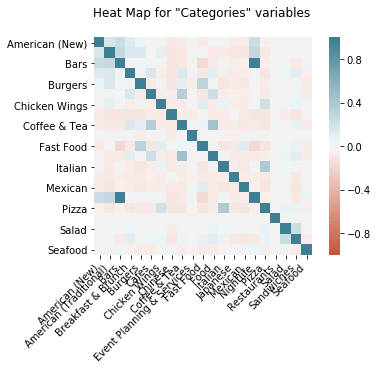

In [10]:
import seaborn as sns

ax = sns.heatmap(
    cat_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200), 
    # annot=True, fmt=".1f", 
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set(title='Heat Map for "Categories" variables \n')
ax.figure.savefig('cat_hm.pdf', bbox_inches='tight')

In [11]:
cat_test_corr = cat_test.corr()

high_correlated_cat_test_couple = []
cat__test_corr_size = range(cat_test_corr.shape[0])
for i in cat__test_corr_size:
    for j in cat__test_corr_size:
        if i > j and abs(cat_test_corr[cat_names[i]][cat_names[j]]) >= 0.8:
            high_correlated_cat_test_couple.append((cat_names[i], cat_names[j]))
high_correlated_cat_test_couple

[('Nightlife', 'Bars')]

In [12]:
# remove some high correlated variables for "categories"

cat_train = cat_train.drop(["Nightlife"], 1) 
cat_test = cat_test.drop(["Nightlife"], 1) 

print(cat_train.shape)
print(cat_test.shape)

(25065, 20)
(8355, 20)


In [13]:
scaler = StandardScaler()

lat_long_rc_train = pd.concat([X_train["latitude"], X_train["longitude"], X_train["review_count"]], axis=1)
lat_long_rc_test = pd.concat([X_test["latitude"], X_test["longitude"], X_test["review_count"]], axis=1)

lat_long_rc_train = scaler.fit_transform(lat_long_rc_train)
lat_long_rc_test = scaler.transform(lat_long_rc_test)

lat_long_rc_train = pd.DataFrame(lat_long_rc_train)
lat_long_rc_test = pd.DataFrame(lat_long_rc_test)

lat_long_rc_train.columns = ["latitude", "longitude", "review_count"]
lat_long_rc_test.columns = ["latitude", "longitude", "review_count"]

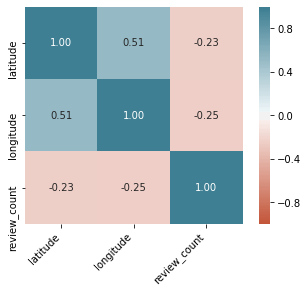

In [14]:
lat_long_rc_corr = lat_long_rc_train.corr()
ax = sns.heatmap(
    lat_long_rc_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True, fmt=".2f", 
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
days_open_train = [list(x.keys()) for x in X_train.loc[:, "hours"].values]
days_open_train = mlb.fit_transform(days_open_train)
days_open_test = [list(x.keys()) for x in X_test.loc[:, "hours"].values]
days_open_test = mlb.transform(days_open_test)

days_open_train = pd.DataFrame(days_open_train)
days_open_train.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
days_open_test = pd.DataFrame(days_open_test)
days_open_test.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

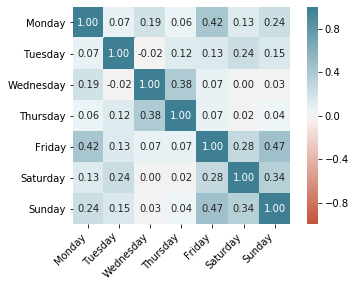

In [16]:
days_open_corr = days_open_train.corr()
ax = sns.heatmap(
    days_open_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True, fmt=".2f", 
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
X_train.loc[:, "attributes"].keys()

Int64Index([118766, 182208, 146023,   4212,  97472,  24934,  92863, 183538,
            154183,  36216,
            ...
            133614,  41825, 151801,  79163, 140431,  74379,  58048,  93066,
            130964,  19480],
           dtype='int64', length=25065)

In [18]:
type(X_train["city"])

pandas.core.series.Series

In [19]:
# Doing One-Hot Encoding on City, Postal Code, State

enc = OneHotEncoder(handle_unknown='ignore')

city_pc_st_train = pd.concat([X_train["city"], X_train["postal_code"], X_train["state"]], axis=1)
city_pc_st_test = pd.concat([X_test["city"], X_test["postal_code"], X_test["state"]], axis=1)

city_pc_st_train = enc.fit_transform(city_pc_st_train)
city_pc_st_test = enc.transform(city_pc_st_test)

#city_train = enc.fit_transform(X_train["city"])
#city_test = enc.transform(X_test["city"])
len(enc.categories_[2])
city_pc_st_test

<8355x7255 sparse matrix of type '<class 'numpy.float64'>'
	with 23707 stored elements in Compressed Sparse Row format>

In [20]:
# Doing One-Hot Encoding on State

enc = OneHotEncoder(handle_unknown='ignore')

state_train = pd.concat([X_train["state"]], axis=1)
state_test = pd.concat([X_test["state"]], axis=1)

state_train = enc.fit_transform(state_train)
state_test = enc.transform(state_test)

state_train = pd.DataFrame(state_train.toarray())
state_train.columns = enc.categories_
state_test = pd.DataFrame(state_test.toarray())
state_test.columns = enc.categories_

In [21]:
state_test

AB   AR   AZ   BC   IL   NC   NE   NM   NV   NY   OH   ON   PA   QC  \
0     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
5     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
6     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
7     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
10    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
12    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
13    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
15    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
16    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
17    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
18    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
19    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
20    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
22    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
23    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
24    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
25    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
26    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
27    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
28    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
29    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8325  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8326  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
8327  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
8328  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8329  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
8330  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8331  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8332  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
8333  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
8334  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8335  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
8336  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8337  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8338  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8339  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8340  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8341  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8342  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8343  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
8344  0.0  0.0  0.0  0.0  0.0

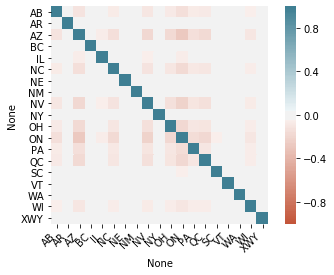

In [22]:
state_corr = state_train.corr()
ax = sns.heatmap(
    state_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [23]:
price_train = [x.get("RestaurantsPriceRange2", "none").lower() for x in X_train.loc[:, "attributes"].values]
reservation_train = [x.get("RestaurantsReservations", "none").lower() for x in X_train.loc[:, "attributes"].values]
alcohol_train = [x.get("Alcohol", "na").strip('u\'').lower() for x in X_train.loc[:, "attributes"].values]
wifi_train = [x.get("WiFi", "na").strip('u\'').lower() for x in X_train.loc[:, "attributes"].values]
wifi_train = [x if x!='none' else 'no' for x in wifi_train]
delivery_train = [x.get("RestaurantsDelivery", "none").lower() for x in X_train.loc[:, "attributes"].values]
goodForGroups_train = [x.get("RestaurantsGoodForGroups", "none").lower() for x in X_train.loc[:, "attributes"].values]
goodForKids_train = [x.get("GoodForKids", "none").lower() for x in X_train.loc[:, "attributes"].values]

attributes_train = pd.DataFrame(
    {'price': price_train,
     'reservation': reservation_train,
     'alcohol': alcohol_train,
     'wifi': wifi_train,
     'delivery': delivery_train,
     'goodForGroups': goodForGroups_train,
     'goodForKids': goodForKids_train
    })

attributes_train = enc.fit_transform(attributes_train)

print(enc.categories_)

price_test = [x.get("RestaurantsPriceRange2", "none").lower() for x in X_test.loc[:, "attributes"].values]
reservation_test = [x.get("RestaurantsReservations", "none").lower() for x in X_test.loc[:, "attributes"].values]
alcohol_test = [x.get("Alcohol", "na").strip('u\'').lower() for x in X_test.loc[:, "attributes"].values]
wifi_test = [x.get("WiFi", "na").strip('u\'').lower() for x in X_test.loc[:, "attributes"].values]
wifi_test = [x if x!='none' else 'no' for x in wifi_test]
delivery_test = [x.get("RestaurantsDelivery", "none").lower() for x in X_test.loc[:, "attributes"].values]
goodForGroups_test = [x.get("RestaurantsGoodForGroups", "none").lower() for x in X_test.loc[:, "attributes"].values]
goodForKids_test = [x.get("GoodForKids", "none").lower() for x in X_test.loc[:, "attributes"].values]

attributes_test = pd.DataFrame(
    {'price': price_test,
     'reservation': reservation_test,
     'alcohol': alcohol_test,
     'wifi': wifi_test,
     'delivery': delivery_test,
     'goodForGroups': goodForGroups_test,
     'goodForKids': goodForKids_test
    })

attributes_test = enc.transform(attributes_test)

[array(['1', '2', '3', '4', 'none'], dtype=object), array(['false', 'none', 'true'], dtype=object), array(['beer_and_wine', 'full_bar', 'na', 'none'], dtype=object), array(['free', 'na', 'no', 'paid'], dtype=object), array(['false', 'none', 'true'], dtype=object), array(['false', 'none', 'true'], dtype=object), array(['false', 'none', 'true'], dtype=object)]


In [24]:
attr_columns_names = ['price_1', 'price_2', 'price_3', 'price_4', 'price_na',
                     'reserve_f', 'reserv_na', 'reserv_t',
                     'alc_beer_wine', 'alc_full_bar', 'alc_na', 'alc_no',
                     'wifi_free', 'wifi_na', 'wifi_no', 'wifi_paid',
                     'delivery_f', 'delivery_na', 'delivery_t',
                     'GFGroups_f', 'GFGroups_na', 'GFGroups_t',
                     'GFKids_f', 'GFKids_na', 'GFKids_t']

attributes_train = pd.DataFrame(attributes_train.toarray())
attributes_train.columns = attr_columns_names
attributes_test = pd.DataFrame(attributes_test.toarray())
attributes_test.columns = attr_columns_names
attributes_test

price_1  price_2  price_3  price_4  price_na  reserve_f  reserv_na  \
0         0.0      1.0      0.0      0.0       0.0        0.0        0.0   
1         1.0      0.0      0.0      0.0       0.0        0.0        1.0   
2         1.0      0.0      0.0      0.0       0.0        1.0        0.0   
3         0.0      1.0      0.0      0.0       0.0        0.0        0.0   
4         0.0      0.0      0.0      0.0       1.0        0.0        0.0   
5         1.0      0.0      0.0      0.0       0.0        1.0        0.0   
6         0.0      0.0      0.0      0.0       1.0        0.0        1.0   
7         0.0      1.0      0.0      0.0       0.0        0.0        0.0   
8         0.0      1.0      0.0      0.0       0.0        1.0        0.0   
9         1.0      0.0      0.0      0.0       0.0        0.0        0.0   
10        1.0      0.0      0.0      0.0       0.0        1.0        0.0   
11        1.0      0.0      0.0      0.0       0.0        0.0        1.0   
12        1.0      0.0      0.0      0.0       0.0        1.0        0.0   
13        0.0      1.0      0.0      0.0       0.0        0.0        0.0   
14        0.0      0.0      0.0      0.0       1.0        1.0        0.0   
15        0.0      1.0      0.0      0.0       0.0        0.0        0.0   
16        0.0      0.0      0.0      1.0       0.0        0.0        0.0   
17        0.0      1.0      0.0      0.0       0.0        1.0        0.0   
18        0.0      1.0      0.0      0.0       0.0        0.0        0.0   
19        1.0      0.0      0.0      0.0       0.0        1.0        0.0   
20        1.0      0.0      0.0      0.0       0.0        1.0        0.0   
21        1.0      0.0      0.0      0.0       0.0        1.0        0.0   
22        1.0      0.0      0.0      0.0       0.0        1.0        0.0   
23        1.0      0.0      0.0      0.0       0.0        1.0        0.0   
24        0.0      0.0      0.0      0.0       1.0        0.0        0.0   
25        0.0      1.0      0.0      0.0       0.0        0.0        0.0   
26        0.0      1.0      0.0      0.0       0.0        0.0        0.0   
27        0.0      1.0      0.0      0.0       0.0        1.0        0.0   
28        1.0      0.0      0.0      0.0       0.0        1.0        0.0   
29        1.0      0.0      0.0      0.0       0.0        1.0        0.0   
...       ...      ...      ...      ...       ...        ...        ...   
8325      0.0      1.0      0.0      0.0       0.0        0.0        0.0   
8326      0.0      1.0      0.0      0.0       0.0        1.0        0.0   
8327      0.0      0.0      0.0      0.0       1.0        1.0        0.0   
8328      0.0      0.0      0.0      0.0       1.0        1.0        0.0   
8329      0.0      1.0      0.0      0.0       0.0        0.0        0.0   
8330      0.0      1.0      0.0      0.0       0.0        0.0        1.0   
8331      1.0      0.0      0.0      0.0       0.0        1.0        0.0   
8332      0.0      0.0      0.0      0.0       1.0        1.0        0.0   
8333      1.0      0.0      0.0      0.0       0.0        0.0        1.0   
8334      0.0      1.0      0.0      0.0       0.0        1.0        0.0   
8335      0.0      0.0      0.0      0.0       1.0        1.0        0.0   
8336      1.0      0.0      0.0      0.0       0.0        1.0        0.0   
8337      0.0      1.0      0.0      0.0       0.0        1.0        0.0   
8338      0.0      1.0      0.0      0.0       0.0        1.0        0.0   
8339      0.0      1.0      0.0      0.0       0.0        1.0        0.0   
8340      0.0      1.0      0.0      0.0       0.0        1.0        0.0   
8341      1.0      0.0      0.0      0.0       0.0        1.0        0.0   
8342      0.0      1.0      0.0      0.0       0.0        1.0        0.0   
8343      1.0      0.0      0.0      0.0       0.0        1.0        0.0   
8344      0.0      1.0      0.0      0.0       0.0        0.0        0.0   
8345      0.0      1.0      0.0      0.0       0.0    

In [25]:
attr_corr = attributes_train.corr()

In [26]:
high_correlated_attr_couple = [] 
attr_corr_size = range(attr_corr.shape[0])
for i in attr_corr_size:
    for j in attr_corr_size:
        if i > j and abs(attr_corr[attr_columns_names[i]][attr_columns_names[j]]) >= 0.8:
            high_correlated_attr_couple.append((attr_columns_names[i], attr_columns_names[j]))
high_correlated_attr_couple

[('reserv_t', 'reserve_f')]

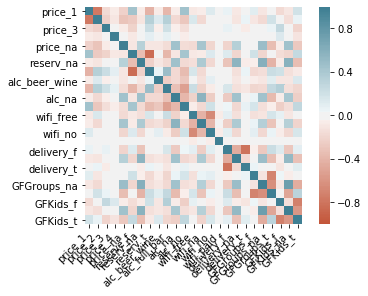

In [27]:
ax = sns.heatmap(
    attr_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.figure.savefig('attr_hm.pdf', bbox_inches='tight')

In [28]:
X_concat_train = hstack([lat_long_rc_train, cat_train, days_open_train, city_pc_st_train, attributes_train], format='csr')
X_concat_test = hstack([lat_long_rc_test, cat_test, days_open_test, city_pc_st_test, attributes_test], format='csr')

In [37]:
import statistics

#checking dummy classifiers
sum(y_train)/len(y_train)
len(y_train[y_train==3.5])/len(y_train)
len(y_test[y_test==3.5])/len(y_test)
len(y_train[y_train==4])/len(y_train)
len(y_test[y_test==4])/len(y_test)
print(statistics.median(y_train))

print(len(y_train[y_train==4])/len(y_train))
print(len(y_test[y_test==4])/len(y_test))

3.5
0.27432675044883303
0.27432675044883303


In [30]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_concat_train, y_train)

In [32]:
def estimate_value(a):
    if a < round(a) + 0.25:
        return round(a)
    elif a > round(a) + 0.75:
        return round(a) + 1
    else:
        return round(a) + 0.5

In [33]:
y_pred = linreg.predict(X_concat_test)
print(y_pred)
new_y_pred = []
for y_i in y_pred:
    new_y_pred.append(estimate_value(y_i))
print(new_y_pred)

[4.27451031 3.39038335 2.84378193 ... 3.2893476  3.67123176 3.37881876]
[4.5, 3.5, 3.0, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.0, 3.0, 4.0, 3.0, 4.0, 5.0, 3.5, 4.0, 3.5, 4.0, 3.5, 4.0, 3.5, 4.0, 4.0, 3.0, 4.5, 3.5, 3.5, 3.5, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.5, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.5, 4.0, 2.5, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.5, 4.0, 3.5, 4.0, 4.0, 3.5, 4.0, 3.5, 4.0, 4.0, 4.0, 3.5, 3.0, 4.0, 3.0, 4.0, 3.0, 3.5, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.5, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.5, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.5, 3.0, 3.0, 4.0, 3.0, 3.0, 3.5, 3.0, 4.0, 4.0, 4.5, 4.0, 3.5, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.0, 4.0, 3.0, 3.5, 4.0, 3.5, 3.5, 4.0, 3.0, 4.5, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 2.5, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.5, 4.0, 3.0, 4.0, 3.5, 3.0, 3.0, 4.0, 3.0, 3.5, 3.0, 2.5, 3.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.

In [36]:
from sklearn.metrics import r2_score
print (linreg.score(X_concat_train, y_train))
print (linreg.score(X_concat_test, y_test))
print(r2_score(y_test, new_y_pred))

0.4872256619770111
0.10272786104942855
0.012073380559073477


In [79]:
y_train.shape

(25065,)

In [39]:
from sklearn.linear_model import Ridge

linridge = Ridge()
parameters = {'alpha': [1e-8, 1, 5, 50, 100, 500, 1000]}
ridge_regressor = GridSearchCV(linridge, parameters, cv=5)
ridge_regressor.fit(X_concat_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-08, 1, 5, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
0.2500435076211671


In [ ]:
linridge()

In [170]:
# RIDGE

for this_alpha in [1e-8, 1, 5, 50, 100, 500, 1000]:
    linridge = Ridge(alpha = this_alpha)
    linridge.fit(X_concat_train, y_train)
    print('Alpha = ', this_alpha)
    print (linridge.score(X_concat_train, y_train))
    print(linridge.score(X_concat_test, y_test))
    print('----------------------------')


Alpha =  1e-08
0.4366686261587327
0.2258010864838482
----------------------------
Alpha =  1
0.40465875531697726
0.2412815737832299
----------------------------
Alpha =  5
0.3434547360806622
0.2562457393518768
----------------------------
Alpha =  50
0.27754805901449686
0.26360059805150604
----------------------------
Alpha =  100
0.2677908283891265
0.26310857309896407
----------------------------
Alpha =  500
0.2487770536655155
0.25410350940740567
----------------------------
Alpha =  1000
0.23583901404477536
0.24216224971516676
----------------------------


In [171]:
# Try using just the normalize numerical data -> lat_long_rc_train

for this_alpha in [1e-8, 1, 5, 50, 100, 500, 1000]:
    linridge = Ridge(alpha = this_alpha)
    linridge.fit(lat_long_rc_train, y_train)
    print('Alpha = ', this_alpha)
    print (linridge.score(lat_long_rc_train, y_train))
    print(linridge.score(lat_long_rc_test, y_test))
    print('----------------------------')


Alpha =  1e-08
0.02326074922839061
0.02672368778101264
----------------------------
Alpha =  1
0.023260749176344797
0.026723233608495378
----------------------------
Alpha =  5
0.023260747927743686
0.026721416566607422
----------------------------
Alpha =  50
0.023260619721925835
0.026700936360792737
----------------------------
Alpha =  100
0.023260233666607122
0.026678098948693548
----------------------------
Alpha =  500
0.023248337512965733
0.026492538516247773
----------------------------
Alpha =  1000
0.023213343066553538
0.026254463581946493
----------------------------


In [44]:
from sklearn.linear_model import Lasso

linlasso = Lasso()
parameters = {'alpha': [1e-5, 1e-3, 0.1,  1, 2, 3, 5, 10, 20, 50]}
lasso_regressor = GridSearchCV(linlasso, parameters, cv=5)
lasso_regressor.fit(X_concat_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197.1245729397424, tolerance: 1.1945072848094955
  max_iter, tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2141.452643921412, tolerance: 1.2062978293935769
  max_iter, tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1781.5242842266503, tolerance: 1.2060967235188516
  max_iter, tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not 

{'alpha': 0.001}
0.24466125287283208


In [173]:
# LASSO

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha=alpha, normalize=True)
    linlasso.fit(X_concat_train, y_train)
    #r2_train = linlasso.score(X_concat_train, y_train)
    #r2_test = linlasso.score(X_concat_test, y_test)
    
    print('Alpha = ', alpha)
    print(linlasso.score(X_concat_train, y_train))
    print(linlasso.score(X_concat_test, y_test))
    print('----------------------------')


Alpha =  0.5
0.0
-6.622746795414969e-10
----------------------------
Alpha =  1
0.0
-6.622746795414969e-10
----------------------------
Alpha =  2
0.0
-6.622746795414969e-10
----------------------------
Alpha =  3
0.0
-6.622746795414969e-10
----------------------------
Alpha =  5
0.0
-6.622746795414969e-10
----------------------------
Alpha =  10
0.0
-6.622746795414969e-10
----------------------------
Alpha =  20
0.0
-6.622746795414969e-10
----------------------------
Alpha =  50
0.0
-6.622746795414969e-10
----------------------------


In [81]:
# Try using just the normalize numerical data -> lat_long_rc_train

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha)
    linlasso.fit(lat_long_rc_train, y_train)
    #r2_train = linlasso.score(X_concat_train, y_train)
    #r2_test = linlasso.score(X_concat_test, y_test)
    
    print('Alpha = ', alpha)
    print(linlasso.score(lat_long_rc_train, y_train))
    print(linlasso.score(lat_long_rc_test, y_test))
    print('----------------------------')

Alpha =  0.5
0.0
-6.622746795414969e-10
----------------------------
Alpha =  1
0.0
-6.622746795414969e-10
----------------------------
Alpha =  2
0.0
-6.622746795414969e-10
----------------------------
Alpha =  3
0.0
-6.622746795414969e-10
----------------------------
Alpha =  5
0.0
-6.622746795414969e-10
----------------------------
Alpha =  10
0.0
-6.622746795414969e-10
----------------------------
Alpha =  20
0.0
-6.622746795414969e-10
----------------------------
Alpha =  50
0.0
-6.622746795414969e-10
----------------------------


In [44]:
sum(y_train)/len(y_train)
len(y_train[y_train==3.5])/len(y_train)
len(y_train[y_train==4])/len(y_train)
len(y_test[y_test==4])/len(y_test)
import statistics
statistics.median(y_train)

3.5

In [34]:
#basic tree-low accuracy

from sklearn.tree import DecisionTreeClassifier
#from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_cat_train = lab_enc.fit_transform(y_train)
y_cat_test = lab_enc.transform(y_test)

clf = DecisionTreeClassifier().fit(X_concat_train, y_cat_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_concat_train, y_cat_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_concat_test, y_cat_test)))

clf.feature_importances_

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.28


array([0.13620109, 0.13218566, 0.12526989, ..., 0.00561022, 0.00283459,
       0.00819147])

In [86]:
#tree with limited depth-slightly better training accuracy

clf2 = DecisionTreeClassifier(max_depth = 4).fit(X_concat_train, y_cat_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_concat_train, y_cat_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_concat_test, y_cat_test)))

#increasing the max_depth increases training accuracy, but test accuracy is maxed at about 0.29 with max_depth = 4

Accuracy of Decision Tree classifier on training set: 0.30
Accuracy of Decision Tree classifier on test set: 0.31


In [87]:
#random forest-need to tune parameters more but also low accuracy (~0.27)

from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(n_estimators = 20, max_features=5,
                            random_state=0).fit(X_concat_train, y_cat_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf3.score(X_concat_train, y_cat_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf3.score(X_concat_test, y_cat_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.30


In [88]:
#gradient boosting-best accuracy (~0.31)

from sklearn.ensemble import GradientBoostingClassifier

clf4 = GradientBoostingClassifier().fit(X_concat_train, y_cat_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf4.score(X_concat_train, y_cat_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf4.score(X_concat_test, y_cat_test)))

Accuracy of GBDT classifier on training set: 0.41
Accuracy of GBDT classifier on test set: 0.33


              precision    recall  f1-score   support

           0       0.03      0.02      0.03        42
           1       0.24      0.08      0.12       148
           2       0.34      0.28      0.31       398
           3       0.22      0.11      0.14       730
           4       0.28      0.12      0.16      1336
           5       0.32      0.42      0.36      2041
           6       0.36      0.60      0.45      2292
           7       0.34      0.12      0.18      1151
           8       0.35      0.09      0.15       217

    accuracy                           0.33      8355
   macro avg       0.27      0.21      0.21      8355
weighted avg       0.32      0.33      0.30      8355



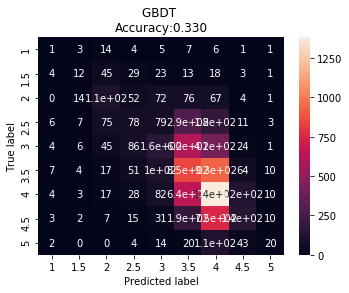

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

gb_predicted_mc = clf4.predict(X_concat_test)
confusion_mc = confusion_matrix(y_cat_test, gb_predicted_mc)
target_names = ["1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]
df_cm = pd.DataFrame(confusion_mc, 
                     index = target_names, columns = target_names)

plt.figure(figsize=(5.5, 4))
sn.heatmap(df_cm, annot=True)
plt.title('GBDT \nAccuracy:{0:.3f}'.format(accuracy_score(y_cat_test, 
                                                                       gb_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_cat_test, gb_predicted_mc))

In [90]:
#slow, would need to tune parameters

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_concat_train, y_cat_train)
print(svm.score(X_concat_test, y_cat_test))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.26      0.17      0.20       148
           2       0.28      0.23      0.25       398
           3       0.19      0.11      0.14       730
           4       0.26      0.18      0.21      1336
           5       0.31      0.36      0.33      2041
           6       0.35      0.50      0.41      2292
           7       0.29      0.19      0.23      1151
           8       0.21      0.13      0.16       217

    accuracy                           0.31      8355
   macro avg       0.24      0.21      0.22      8355
weighted avg       0.29      0.31      0.29      8355



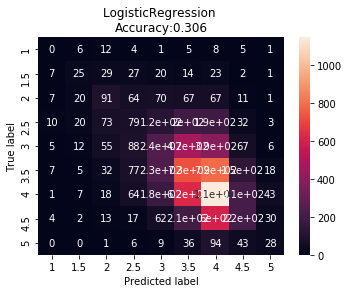

In [91]:
#LR- worst accuracy (~0.24)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(C=20).fit(X_concat_train, y_cat_train)
lr_predicted_mc = lr.predict(X_concat_test)
confusion_mc = confusion_matrix(y_cat_test, lr_predicted_mc)
target_names = ["1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]
df_cm = pd.DataFrame(confusion_mc, 
                     index = target_names, columns = target_names)

plt.figure(figsize=(5.5, 4))
sn.heatmap(df_cm, annot=True)
plt.title('LogisticRegression \nAccuracy:{0:.3f}'.format(accuracy_score(y_cat_test, 
                                                                       lr_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_cat_test, lr_predicted_mc))

In [35]:
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha":[0.1, 1, 50, 500]}
GsCV = GridSearchCV(RidgeClassifier(), param_grid, cv=5, iid=False, n_jobs=-1)
ridge_pipe = Pipeline([('SearchGrid', GsCV),])
ridge_pipe = ridge_pipe.fit(X_concat_train, y_cat_train)
# print(ridge_pipe.score(X_concat_test, y_test))

Ridge_X_Train = ridge_pipe.predict(X_concat_train).reshape(-1,1)
Ridge_X_Test = ridge_pipe.predict(X_concat_test).reshape(-1,1)

In [1]:
print(ridge_pipe.score(X_concat_train, y_cat_train))
print(ridge_pipe.score(X_concat_test, y_cat_test))
print(GsCV.best_params_)
print(GsCV.best_estimator_.coef_)
print("////////////////////////////")
print(GsCV.best_estimator_.intercept_)

NameError: name 'ridge_pipe' is not defined

In [53]:
X_concat_train[0:5,]

  (0, 0)	-1.2907974574900125
  (0, 1)	-1.1973239199930032
  (0, 2)	-0.39866106485138686
  (0, 13)	1.0
  (0, 19)	1.0
  (0, 21)	1.0
  (0, 23)	1.0
  (0, 24)	1.0
  (0, 25)	1.0
  (0, 26)	1.0
  (0, 27)	1.0
  (0, 28)	1.0
  (0, 29)	1.0
  (0, 421)	1.0
  (0, 979)	1.0
  (0, 7268)	1.0
  (0, 7285)	1.0
  (0, 7290)	1.0
  (0, 7296)	1.0
  (0, 7298)	1.0
  (0, 7301)	1.0
  (0, 7306)	1.0
  (0, 7309)	1.0
  (1, 0)	-0.798630540976385
  (1, 1)	-1.3855078533451988
  :	:
  (3, 7301)	1.0
  (3, 7306)	1.0
  (3, 7309)	1.0
  (4, 0)	1.0687626897422549
  (4, 1)	1.1352283242588748
  (4, 2)	-0.4206525626470519
  (4, 6)	1.0
  (4, 19)	1.0
  (4, 20)	1.0
  (4, 21)	1.0
  (4, 23)	1.0
  (4, 24)	1.0
  (4, 27)	1.0
  (4, 28)	1.0
  (4, 29)	1.0
  (4, 349)	1.0
  (4, 1957)	1.0
  (4, 7279)	1.0
  (4, 7285)	1.0
  (4, 7290)	1.0
  (4, 7296)	1.0
  (4, 7298)	1.0
  (4, 7301)	1.0
  (4, 7306)	1.0
  (4, 7309)	1.0


In [51]:
GsCV.best_estimator_.coef_.shape

(9, 7310)

In [55]:
import numpy as np
print(GsCV.best_estimator_.coef_.max())

itemindex = np.where(GsCV.best_estimator_.coef_==GsCV.best_estimator_.coef_.max())
itemindex

0.1925384245693011


(array([2]), array([13]))

In [97]:
from sklearn import linear_model
# from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha":[0.1, 1, 50, 500]}
LASSO_GsCV = GridSearchCV(linear_model.Lasso(), param_grid, cv=5, iid=False, n_jobs=-1)
LASSO_pipe = Pipeline([('SearchGrid', LASSO_GsCV),])
LASSO_pipe = LASSO_pipe.fit(X_concat_train, y_cat_train)
# print(ridge_pipe.score(X_concat_test, y_test))

LASSO_X_Train = LASSO_pipe.predict(X_concat_train).reshape(-1,1)
LASSO_X_Test = LASSO_pipe.predict(X_concat_test).reshape(-1,1)

In [98]:
print(LASSO_pipe.score(X_concat_train, y_cat_train))
print(LASSO_pipe.score(X_concat_test, y_cat_test))
LASSO_GsCV.best_params_

0.09868924249395483
0.10690145942245399


{'alpha': 0.1}

In [94]:
# grid_search = GridSearchCV(clf4,  param_grid=None, cv=5)
# GBDT_pipe = Pipeline([('SearchGrid', grid_search),])
# GBDT_pipe = GBDT_pipe.fit
GBDT_X_train = clf4.predict(X_concat_train)
GBDT_X_train = clf4.predict(X_concat_test)

In [95]:
GBDT_X_train

array([6, 6, 2, ..., 5, 6, 5])

In [96]:
LR_X_train = lr.predict(X_concat_train)
LR_X_test = lr.predict(X_concat_test)

In [ ]:
#KNN
train_scores = []
test_scores = []
dimension_range = [1, 5, 10, 20, 50, 100, 200, 300, 400]
for d in dimension_range:
    knn = KNeighborsClassifier(n_neighbors = d)
    knn.fit(lat_long_rc_train, y_cat_train)
    train_scores.append(knn.score(lat_long_rc_train, y_cat_train))
    test_scores.append(knn.score(lat_long_rc_test, y_cat_test))
plt.plot(dimension_range, train_scores, 'bo')
plt.plot(dimension_range, test_scores, 'ro')
plt.show()
print(train_scores)
print(test_scores)

In [209]:
#neural net
y_binary_train = to_categorical(y_cat_train)
y_binary_test = to_categorical(y_cat_test)

model = ts.keras.models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(X_concat_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_concat_train,
                    y_binary_train,
                    epochs=5,
                    batch_size=32,
                    validation_split  = 0.2) 

model.evaluate(X_concat_test, y_binary_test, verbose=1)

NameError: name 'to_categorical' is not defined

In [ ]:
FeedForward_X_Train = model.predict(X_train)
FeedForward_X_Test  = model.predict(X_test)
FeedForwardSQ_X_Train = np.argmax(FeedForward_X_Train, axis=1, out = None)
FeedForwardSQ_X_Test = np.argmax(FeedForward_X_Test, axis=1, out = None)

In [ ]:


Ensemble_X_Train = np.column_stack((FeedForwardSQ_X_Train,BNB_X_Train,PA_X_Train,Ridge_X_Train))
Ensemble_X_Test = np.column_stack((FeedForwardSQ_X_Test,BNB_X_Test,PA_X_Test,Ridge_X_Test))